In [1]:
from selenium import webdriver
from bs4 import BeautifulSoup
import time

driver = webdriver.Chrome('D:/chromedriver')

driver.implicitly_wait(3)

#login
driver.get('https://data.kma.go.kr/cmmn/main.do')

driver.find_element_by_id('loginBtn').click()

driver.find_element_by_id('loginId').send_keys('fantastic402@gmail.com')
driver.find_element_by_id('passwordNo').send_keys('tmydbywyer')

driver.find_element_by_xpath('//*[@id="loginbtn"]').click()
time.sleep(2)

#종간기상관측
driver.find_element_by_xpath('//*[@id="gnb"]/ul/li[2]/a').click()
time.sleep(2)

driver.find_element_by_id('dataFormCd').click() #일간데이터
time.sleep(1)
driver.find_element_by_xpath('//*[@id="dataFormCd"]/option[2]').click()
time.sleep(1)
driver.find_element_by_id('btnStn1').click() #서울데이터
time.sleep(2)
driver.find_element_by_id('ztree_2_check').click() 
time.sleep(1)
driver.find_element_by_xpath('//*[@id="sidetreecontrol"]/ul[2]/li/a').click() 
time.sleep(1)
driver.find_element_by_id('gubun').click() #평균기온
time.sleep(2)
driver.find_element_by_id('ztree_7_check').click() 
time.sleep(1)
driver.find_element_by_xpath('//*[@id="sidetreecontrol"]/ul[2]/li/a').click() 
time.sleep(1)
driver.find_element_by_id('schListCnt').click() #전체건수 100
time.sleep(1)
driver.find_element_by_xpath('//*[@id="schListCnt"]/option[10]').click()
time.sleep(1)
driver.find_element_by_xpath('//*[@id="dsForm"]/div[3]/a[1]/span').click() #조회
time.sleep(2)
# driver.find_element_by_xpath('//*[@id="content"]/div[2]/div[3]/div[2]/div[2]/a').click() #다운로드

In [2]:
driver.page_source

'<!DOCTYPE html><html xmlns="http://www.w3.org/1999/xhtml" lang="ko-KR"><head>\n<meta charset="UTF-8" />\n<meta http-equiv="X-UA-Compatible" content="IE=edge" />\n<title>기상자료개방포털</title>\n<meta name="keywords" content="기상청, 기상자료개방포털" />\n<meta name="description" content="기상청, 기상자료개방포털" />\n<link rel="shortcut icon" href="/resources/images/favicon.png" />\n<link rel="stylesheet" type="text/css" href="/resources/css/common.css" media="all" />\n<link rel="stylesheet" type="text/css" href="/resources/css/font-awesome.min.css" media="all" />\n<link rel="stylesheet" type="text/css" href="/resources/css/common-ui.css" media="all" />\n<link rel="stylesheet" type="text/css" href="/resources/css/board.css" media="all" />\n<link rel="stylesheet" type="text/css" href="/resources/css/layout.css" media="all" />\n<link rel="stylesheet" type="text/css" href="/resources/css/sub.css" media="all" />\n<link rel="stylesheet" type="text/css" href="/resources/css/sub-etc.css" media="all" />\n<link rel="style

In [3]:
soup = BeautifulSoup(driver.page_source, 'html.parser')

Seoul = soup.find('table', {'class' : 'bbsList table'})

In [4]:
Seoul

<table class="bbsList table">
<caption>조회 결과</caption>
<colgroup id="colGroup"><col style="width:70px;"/><col style="width:140px;"/><col style="width:104px;"/></colgroup>
<thead>
<tr id="headerNm"><th style="width:70px;">지점</th><th style="width:140px;">시간</th><th scope="col">평균기온(°C)</th></tr>
</thead>
<tbody id="contentsList"><tr><td style="width:70px;">서울(108)</td><td style="width:140px;">2018-10-06</td><td style="width:100px;">18</td></tr><tr><td style="width:70px;">서울(108)</td><td style="width:140px;">2018-10-07</td><td style="width:100px;">16.4</td></tr><tr><td style="width:70px;">서울(108)</td><td style="width:140px;">2018-10-08</td><td style="width:100px;">14.8</td></tr><tr><td style="width:70px;">서울(108)</td><td style="width:140px;">2018-10-09</td><td style="width:100px;">15.3</td></tr><tr><td style="width:70px;">서울(108)</td><td style="width:140px;">2018-10-10</td><td style="width:100px;">12</td></tr><tr><td style="width:70px;">서울(108)</td><td style="width:140px;">2018-10-11</td>

In [45]:
import pandas as pd
import numpy as np
from datetime import datetime

date = []
temp = []

for tr in Seoul.find_all('tr'):
    #trs = list(Seoul.find_all('tr'))
    tds = list(tr.find_all('td'))
    #print(tds)
    count = 0
    for td in tds:
        date.append(tds[1].text)
        temp.append(float(tds[2].text))
        count = count + 1
        if count == 1:
             break

print(date)

df = pd.DataFrame({
    'Date':date,
    'Temp':temp,
    
})
#df=df.set_index(df['Date'])
df['Date'] = df['Date'].apply(lambda x:datetime.strptime(x,'%Y-%m-%d'))
df=df.set_index('Date')
df.dtypes

['2018-10-06', '2018-10-07', '2018-10-08', '2018-10-09', '2018-10-10', '2018-10-11', '2018-10-12', '2018-10-13', '2018-10-14', '2018-10-15', '2018-10-16', '2018-10-17', '2018-10-18', '2018-10-19', '2018-10-20', '2018-10-21', '2018-10-22', '2018-10-23', '2018-10-24', '2018-10-25', '2018-10-26', '2018-10-27', '2018-10-28', '2018-10-29', '2018-10-30', '2018-10-31', '2018-11-01', '2018-11-02', '2018-11-03', '2018-11-04', '2018-11-05']


Temp    float64
dtype: object

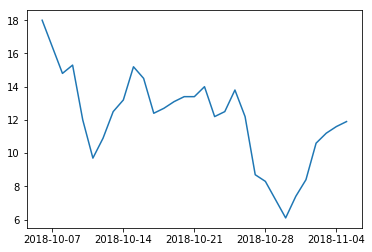

In [46]:
import matplotlib.pyplot as plt

plt.plot(df)

In [63]:
from pandas import Series

time_df = df.copy()
time_df['Temp'] = Series(df['Temp'])